In [1]:
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import matplotlib.pyplot as plt # plotting
from skimage.io import imread # read in images
from skimage.segmentation import mark_boundaries # mark labels
from sklearn.metrics import roc_curve, auc # roc curve tools
from skimage.color import label2rgb
import numpy as np # linear algebra / matrices
# make the notebook interactive
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets #add new widgets
from IPython.display import display
#from skimage.util.montage import montage2d

In [2]:
from glob import glob
from os.path import split, splitext, join
base_dir = '../input/aicddataset/AICDDataset/'
all_img_dict = {'_'.join(splitext(split(x)[1])[0].split('_')[0:2]): x for x in glob(join(base_dir,'GroundTruth','*.png'))}
all_img_keys = list(all_img_dict.keys())
def read_diff_img(key_id):
    cvs = {'path': base_dir, 'code': key_id}
    t0_img = imread('{path}/Images_Shadows/{code}_moving.png'.format(**cvs))[:,:,0:3]
    t1_img = imread('{path}/Images_Shadows/{code}_target.png'.format(**cvs))[:,:,0:3]
    
    cg_img = imread('{path}/GroundTruth/{code}_gtmask.png'.format(**cvs))
    print(cg_img.shape)
    if len(cg_img.shape)==3: cg_img = cg_img[:,:,0]
    return (t0_img,t1_img, cg_img)
    
a,b,c = read_diff_img(all_img_keys[0])
print(a.shape,b.shape, c.shape)

(600, 800)
(600, 800, 3) (600, 800, 3) (600, 800)


(600, 800)


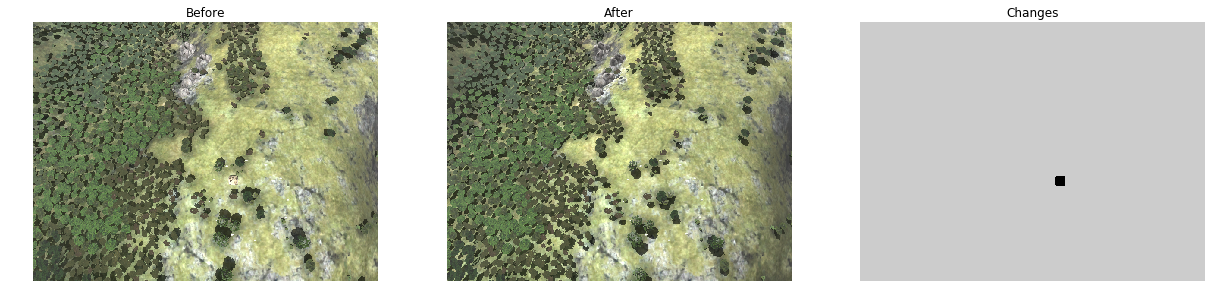

In [3]:
%matplotlib inline
def make_change_figure(in_key):
    a,b,c = read_diff_img(in_key)
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (21,7))
    ax1.imshow(a)
    ax1.set_title('Before')
    ax1.axis('off')
    ax2.imshow(b)
    ax2.set_title('After')
    ax2.axis('off')
    d = skimage.measure.label(c)
    ax3.imshow(d, cmap = 'nipy_spectral_r')
    ax3.set_title('Changes')
    ax3.axis('off')
    return fig
make_change_figure(all_img_keys[0]).savefig('overview.png', dpi = 300)

(600, 800)
(600, 800)
(600, 800)
(600, 800)
(600, 800, 4)
(600, 800)
(600, 800, 4)
(600, 800)
(600, 800)
(600, 800, 4)
(600, 800)
(600, 800, 4)
(600, 800)
(600, 800)
(600, 800, 4)
(600, 800)
(600, 800, 4)
(600, 800)
(600, 800, 4)
(600, 800)


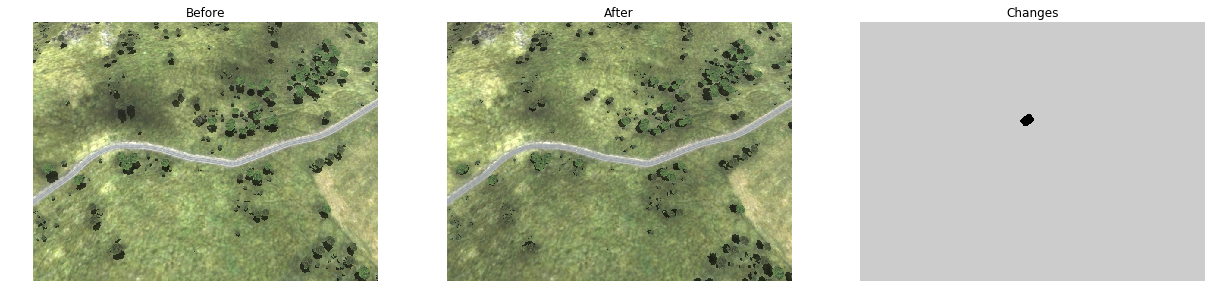

In [4]:
comp_fig_dict = {}
for ikey in np.random.permutation(all_img_keys)[:20]:
    plt.close('all')
    fig = make_change_figure(ikey)
    out_path = '%s.png' % (ikey)
    fig.savefig(out_path)
    comp_fig_dict[ikey] = out_path

In [5]:
%matplotlib inline
def draw_rand_img(x_wid = 256,y_wid = 256, min_obj = 0.05):
    
    
    cc = np.zeros((3,3))
    r_img = np.random.randint(len(all_img_keys))
    a,b,c = read_diff_img(all_img_keys[r_img])
    d = skimage.measure.label(c)
    print('Object Pixels:', np.sum(c>0))
    while np.sum(cc>0)<0.5*np.sum(c>0):
        
        x_start = np.random.randint(a.shape[0]-x_wid)
        y_start = np.random.randint(a.shape[1]-y_wid)
        ac,bc,cc,dc = map(lambda x: x[x_start:(x_start+x_wid),y_start:(y_start+y_wid)],[a,b,c,d])
        #print(cc.min(),np.mean(cc>0),np.sum(cc>0))
        
    print(d.min(),np.unique(d.flatten()))
    im_sets = {'interpolation': 'lanczos'}
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8,8))
    ax1.imshow(ac, **im_sets)
    ax1.set_title('Before')
    ax1.axis('off')
    ax2.imshow(bc, **im_sets)
    ax2.set_title('After')
    ax2.axis('off')

    ax3.imshow(np.sqrt(np.mean(np.power(ac-bc,2),2)), cmap = 'inferno', **im_sets)
    ax3.set_title('Raw Difference Image')
    ax3.axis('off')
    
    ax4.imshow(label2rgb(dc,ac, bg_label = 0), **im_sets)
    ax4.set_title('Labeled Differences')
    ax4.axis('off')
    
    return fig

(600, 800, 4)
Object Pixels: 154
0 [0 1]
(600, 800, 4)
Object Pixels: 267
0 [0 1]
(600, 800)
Object Pixels: 228
0 [0 1]
(600, 800)
Object Pixels: 182
0 [0 1]
(600, 800)
Object Pixels: 263
0 [0 1]
(600, 800)
Object Pixels: 380
0 [0 1]
(600, 800)
Object Pixels: 608
0 [0 1]
(600, 800)
Object Pixels: 523
0 [0 1]
(600, 800, 4)
Object Pixels: 560
0 [0 1]
(600, 800, 4)
Object Pixels: 95
0 [0 1]


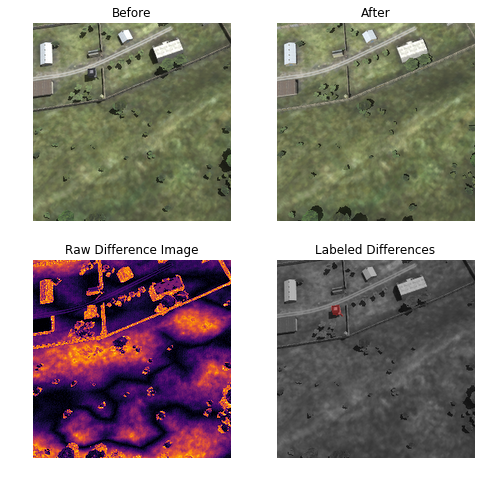

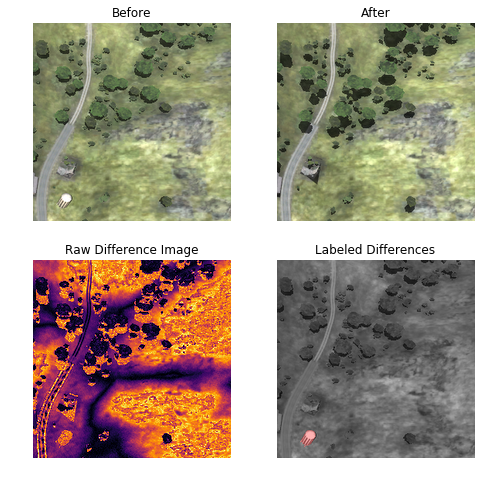

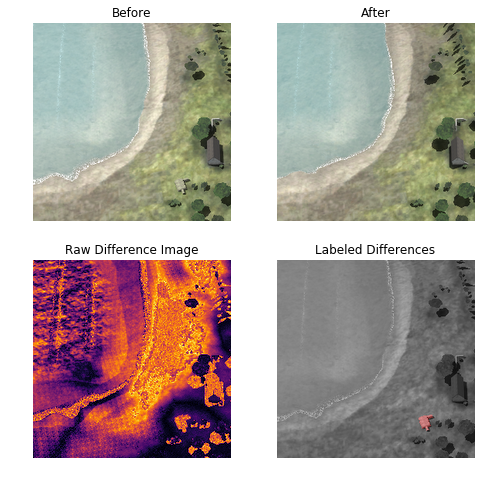

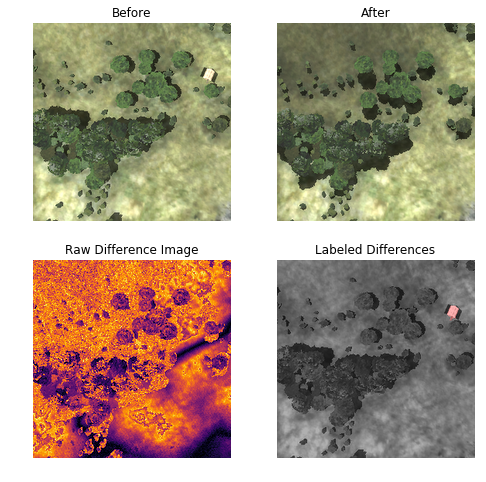

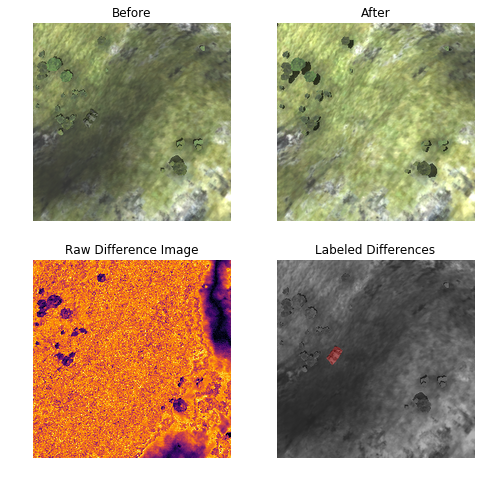

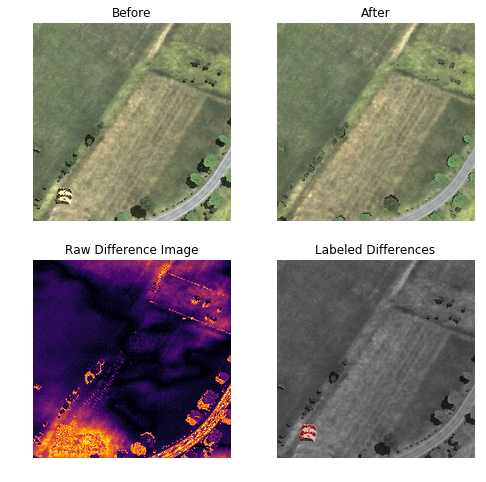

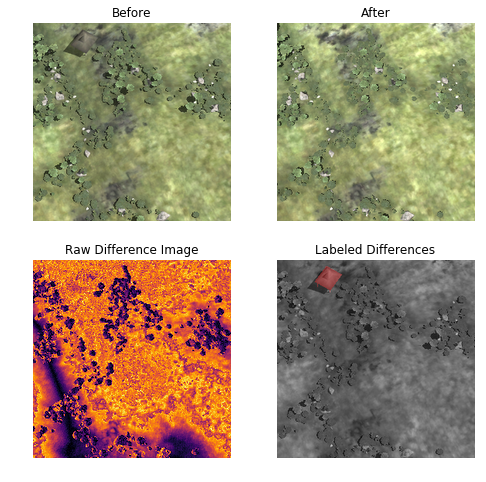

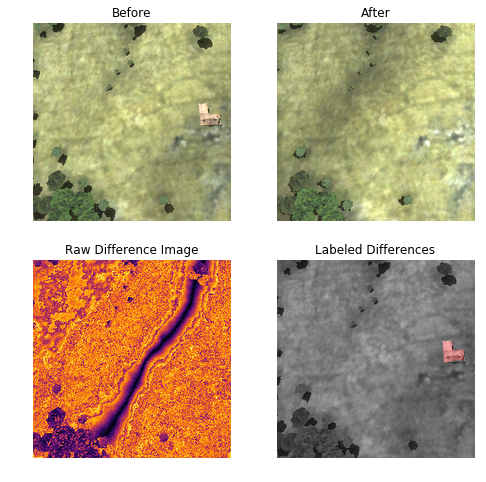

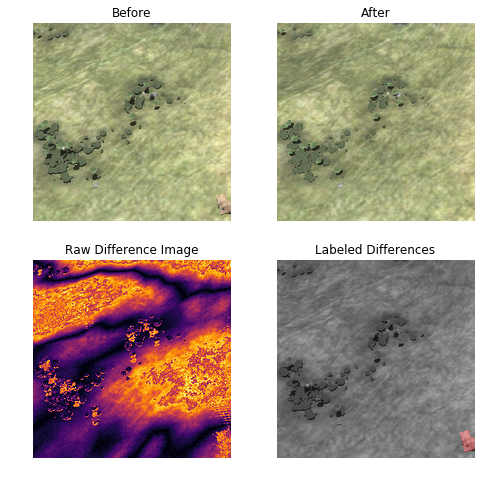

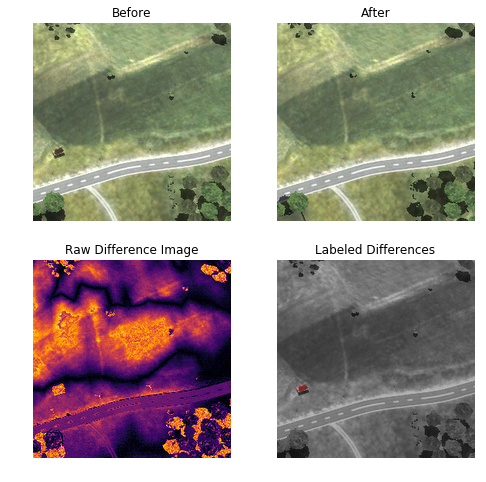

In [6]:
for i in range(10):
    draw_rand_img().savefig('single_fig_{}.png'.format(i), dpi = 300)